# 정규성 검정

## Question
다음 데이터의 정규성을 검증하라



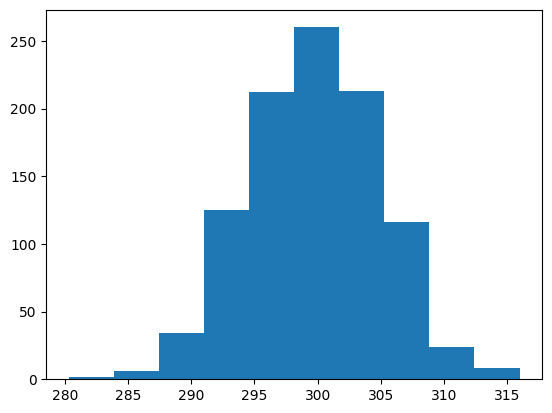

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [8]:
from scipy.stats import shapiro

In [12]:
s, p = shapiro(df)
print('p-value:', p)

p-value: 0.3485966622829437


In [13]:
alpha = 0.05

if p < alpha:
    print('대립가설 채택 : 데이터가 정규성을 가지지 않는다.')
else:
    print('귀무가설 채택 : 데이터가 정규성을 가진다.')

귀무가설 채택 : 데이터가 정규성을 가진다.


## Question
다음 데이터의 정규성을 검증하라



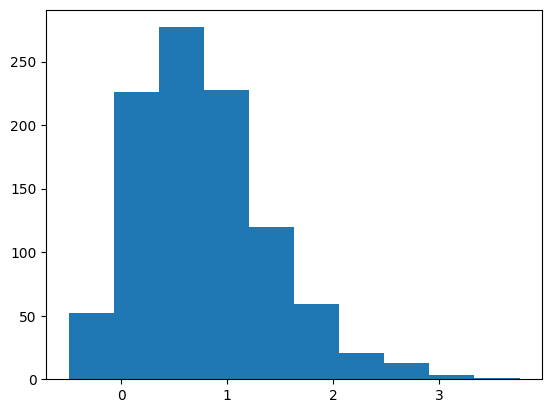

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [15]:
from scipy.stats import shapiro

In [16]:
s, p_value = shapiro(df)
print('p-value:', p_value)

alpha = 0.05

if p_value < alpha:
    print('대립가설 채택 : 데이터가 정규분포를 따르지 않는다.')
else:
    print('귀무가설 채택 : 데이터가 정규분포를 따른다.')

p-value: 2.309859641255865e-16
대립가설 채택 : 데이터가 정규분포를 따르지 않는다.


## Question
위의 데이터를 log변환 한 후에 정규성을 가지는지 확인하


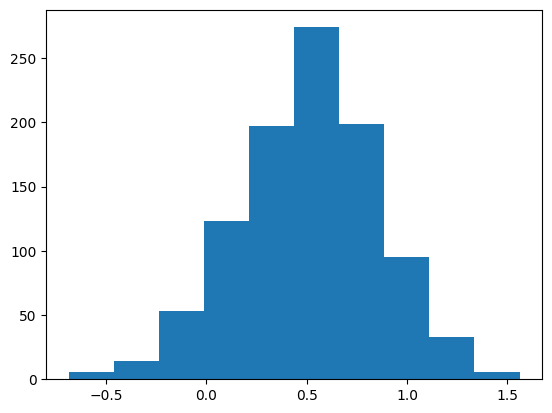

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()

In [20]:
from scipy.stats import shapiro

In [21]:
s, p_value = shapiro(log_y_data)
print('p-value:', p_value)

alpha = 0.05

if p_value < alpha:
    print('대립가설 채택: 데이터가 정규성을 갖지 않는다.')
else:
    print('귀무가설 채택: 데이터가 정규성을 갖는다.')

p-value: 0.17551212012767792
귀무가설 채택: 데이터가 정규성을 갖는다.


## Question
다음 데이터의 정규성을 검증하라

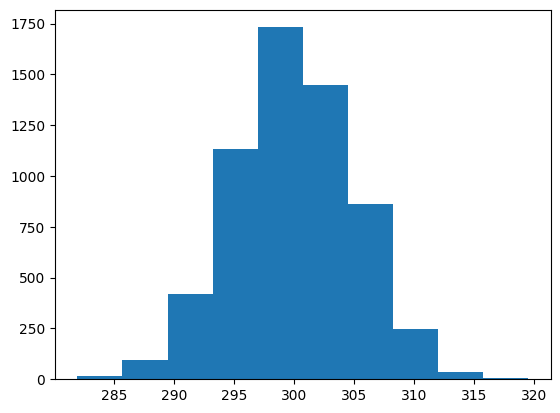

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [23]:
df.shape

(6000, 1)

In [24]:
# 샘플 수가 5000개 초과일 경우 shapiro 정규성 검정은 부정확할 수 있다는 경고 메세지 나옴

from scipy.stats import shapiro

s, p_value = shapiro(df)
print('p-값:', p_value)

alpha = 0.05

if p_value < alpha:
    print('대립가설 채택: 데이터가 정규분포를 따르지 않는다.')
else:
    print('귀무가설 채택: 데이터가 정규분포를 따른다.')

p-값: 0.15070641040802002
귀무가설 채택: 데이터가 정규분포를 따른다.


C:\Users\dudejr\anaconda3\envs\kaggle\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
df.values

array([[296.01680341],
       [299.62847649],
       [298.23205699],
       ...,
       [302.54242027],
       [294.45614507],
       [301.73381948]])

In [32]:
# 샘플 수 5000개 초과 시 anderson 정규성 검정 사용

from scipy.stats import anderson

res = anderson(df['data'].values)
print(res)

s, critic_arr, significance_arr = anderson(df['data'].values)
if s > critic_arr[2]:
    print('대립가설 채택: 데이터가 정규성을 갖지 않는다.')
else:
    print('귀무가설 채택: 데이터가 정규성을 갖는다.')

AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
대립가설 채택: 데이터가 정규성을 갖지 않는다.


# 단일 표본 t-검정(one-sample)

## Question
100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
df.head()

,height
0,160.237691
1,164.747324
2,165.401628
3,168.801627
4,153.199021


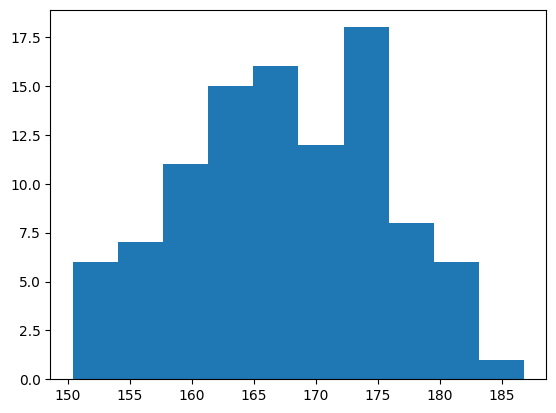

In [56]:
plt.hist(df)
plt.show()

In [57]:
# 정규성 검정

from scipy.stats import shapiro

s, p_value = shapiro(df)
print('샤피로 정규성 검정 p-value :', p_value)

alpha = 0.05

if p_value < alpha:
    print('대립가설 채택 : 데이터가 정규분포를 따르지 않으므로 비모수 검정으로 윌콕슨 부호 순위 검정을 수행한다.')
    
    from scipy.stats import wilcoxon
    
    s, p_value = wilcoxon(df['height'] - 165, alternative='two-sided')  # ~보다 큰지 : greater, ~보다 작은지 less
    print('윌콕슨 부호 순위 검정 p-value:', p_value)
    
    if p_value < alpha:
        print('대립가설 채택 : 평균 키가 165가 아니다.')
    else:
        print('귀무가설 채택 : 평균 키가 165다.')
    
else:
    print('귀무가설 채택 : 데이터가 정규분포를 따르므로 모수 검정으로 단일 표본 t-검정을 수행한다.')
    
    from scipy.stats import ttest_1samp
    
    s, p_value = ttest_1samp(df['height'], 165, alternative='two-sided')  # ~보다 큰지 : greater, ~보다 작은지 less
    print('단일 표본 t-검정 p-value :', p_value)

    if p_value < alpha:
        print('대립가설 채택 : 평균키가 165가 아니다.')
    else:
        print('귀무가설 채택 : 평균키가 165다.')

샤피로 정규성 검정 p-value : 0.455832302570343
귀무가설 채택 : 데이터가 정규분포를 따르므로 모수 검정으로 단일 표본 t-검정을 수행한다.
단일 표본 t-검정 p-value : 0.0018367171548080209
대립가설 채택 : 평균키가 165가 아니다.


## Question
100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')
df.head()

,height
0,182.012475
1,166.857081
2,159.633265
3,159.633265
4,169.428478


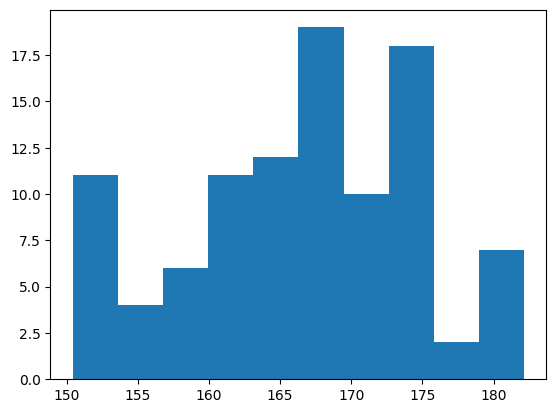

In [63]:
plt.hist(df)
plt.show()

In [64]:
print('데이터 개수 : ', df.shape)

데이터 개수 :  (100, 1)


In [67]:
# 정규성 검정

from scipy.stats import shapiro

s, p_value = shapiro(df['height'])
print('shapiro 정규성 검정 p-value:', p_value)

alpha = 0.05

if p_value < alpha:
    print('대립가설 채택: 데이터가 정규분포를 따르지 않는다.')
    print('비모수 검정으로 윌콕슨 부호 순위 검정을 수행한다.')
    
    from scipy.stats import wilcoxon
    s, p_value = wilcoxon(df['height'] - 165, alternative='two-sided')
    
    if p_value < alpha:
        print('대립가설 채택: 평균 키가 165가 아니다.')
    else:
        print('귀무가설 채택: 평균 키가 165다.')
else:
    print('귀무가설 채택: 데이터가 정규분포를 따른다.')
    print('모수 검정으로 단일 표본 t-검정을 수행한다.')
    
    from scipy.stats import ttest_1samp
    s, p_value = ttest_1samp(df['height'], 165, alternative='two-sided')
    
    if p_value < alpha:
        print('대립가설 채택: 평균 키가 165가 아니다.')
    else:
        print('귀무가설 채택: 평균 키가 165다.')

shapiro 정규성 검정 p-value: 0.013552471995353699
대립가설 채택: 데이터가 정규분포를 따르지 않는다.
비모수 검정으로 윌콕슨 부호 순위 검정을 수행한다.
대립가설 채택: 평균 키가 165가 아니다.


# 등분산 검정

## Question
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [97]:
print('데이터 개수:', df.shape)

데이터 개수: (480, 2)


In [98]:
# 정규성 검정

a = df[df['class'] == 'A']['score']
b = df[df['class'] == 'B']['score']

from scipy.stats import shapiro

s, p_value_a = shapiro(a)
s, p_value_b = shapiro(b)
print('A 학급 시험성적 샤피로 p-value:', p_value_a)
print('B 학급 시험성적 샤피로 p-value:', p_value_b)

A 학급 시험성적 샤피로 p-value: 4.097050521068013e-08
B 학급 시험성적 샤피로 p-value: 1.1735459111150703e-06


In [99]:
# p_value_a = 0.6
# p_value_b = 0.7

In [102]:
alpha = 0.05

if p_value_a < alpha or p_value_b < alpha:
    print('대립가설 채택: A, B 두 학급 중 최소 한 학급이 정규성을 갖지 않는다.')
    print('비모수 검정으로 levene 검정을 수행한다.')
    
    from scipy.stats import levene
    
    s, p_value = levene(a, b)
    print('levene 검정 p-value:', p_value)
    
    if p_value < alpha:
        print('대립가설 채택: 두 그룹은 등분산이 아니다.')
    else:
        print('귀무가설 채택: 두 그룹은 등분산이다.')
else:
    print('귀무가설 채택: A, B 두 학급 모두 정규성을 갖는다.')
    print('모수 검정으로 bartlett 검정을 수행한다.')
    
    from scipy.stats import bartlett
    
    s, p_value = bartlett(a, b)
    print('bartlett 검정 p-value:', p_value)
    
    if p_value < alpha:
        print('대립가설 채택: 두 그룹은 등분산이 아니다.')
    else:
        print('귀무가설 채택: 두 그룹은 등분산이다.')

대립가설 채택: A, B 두 학급 중 최소 한 학급이 정규성을 갖지 않는다.
비모수 검정으로 levene 검정을 수행한다.
levene 검정 p-value: 0.5751662820554713
귀무가설 채택: 두 그룹은 등분산이다.


## Question
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [103]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [104]:
df.isnull().sum()

A      0
B    120
dtype: int64

In [105]:
df.shape

(300, 2)

In [108]:
from scipy.stats import levene, bartlett, fligner

In [111]:
# 등분산 검정 시 결측치 있는 컬럼의 레코드를 dropna 해줘야함.

print(bartlett(df['A'], df['B']))
print(bartlett(df['A'], df['B'].dropna()))

print(fligner(df['A'], df['B']))
print(fligner(df['A'], df['B'].dropna()))

print(levene(df['A'], df['B']))
print(levene(df['A'], df['B'].dropna()))

BartlettResult(statistic=4.119254834772108, pvalue=0.04239774936707851)
BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)
FlignerResult(statistic=372.546422798273, pvalue=5.22112391778621e-83)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


# 독립 표본 t-검정 (Independent)
독립 표본 t검정의 경우 집단의 정규성에 따라 접근방식이 다르다
정규성 검정은 shapiro , anderson(샘플 5000개 이상) 을 통해 확인

## Question
두개 학급의 시험성적에 대한 데이터이다. 두 학급의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

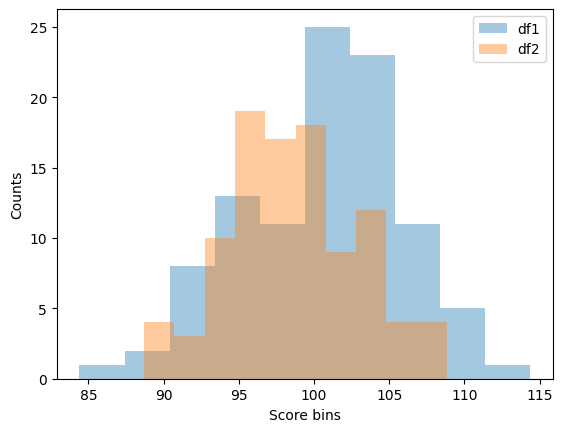

In [153]:
import pandas as pd 
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [154]:
df1.isnull().sum()

data    0
dtype: int64

In [155]:
df2.isnull().sum()

data    0
dtype: int64

In [156]:
# 정규성 검정

from scipy.stats import shapiro

s, p_value_1 = shapiro(df1)
s, p_value_2 = shapiro(df2)
print('1학급 시험성적 p-value:', p_value_1)
print('2학급 시험성적 p-value:', p_value_2)

alpha = 0.05

if p_value_1 < alpha or p_value_2 < alpha:
    print('대립가설 채택 : 두 학급 시험성적 중 최소 하나가 정규성을 갖지 않는다.')
else:
    print('귀무가설 채택 : 두 학급 시험성적 모두 정규성을 갖는다.')

1학급 시험성적 p-value: 0.37968069314956665
2학급 시험성적 p-value: 0.6793646216392517
귀무가설 채택 : 두 학급 시험성적 모두 정규성을 갖는다.


In [157]:
# 등분산 검정
from scipy.stats import levene

s, p_value = levene(df1['data'], df2['data'])
print('bartlett 검정 p-value:', p_value)

bartlett 검정 p-value: 0.11302904824469093


In [158]:
if p_value < alpha:
    print('대립가설 채택 : 두 학급 시험성적은 등분산이 아니다.')
else:
    print('귀무가설 채택 : 두 학급 시험성적은 등분산이다.')

귀무가설 채택 : 두 학급 시험성적은 등분산이다.


In [167]:
from scipy.stats import ttest_ind
s, p_value = ttest_ind(df1['data'], df2['data'])
print('독립 표본 t-검정 p-value:', p_value)

독립 표본 t-검정 p-value: 0.00619015106792926


In [139]:
if p_value < alpha:
    print('대립가설 채택: 두 학급의 시험성적 평균은 다르다.')
else:
    print('귀무가설 채택: 두 학급의 시험성적 평균은 같다.')

대립가설 채택: 두 학급의 시험성적 평균은 다르다.


## Question
두개 학급의 시험성적에 대한 데이터이다. 두 학급의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

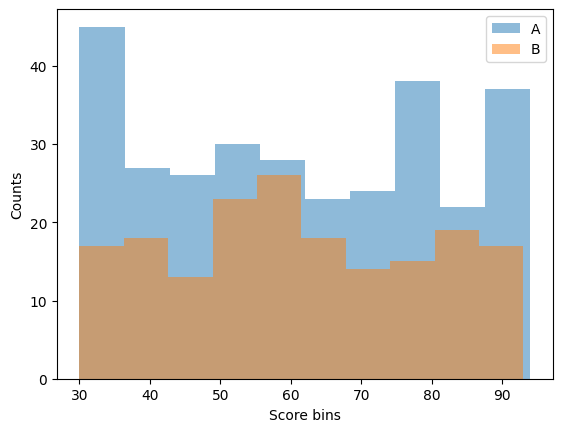

In [143]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [144]:
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [145]:
df.isnull().sum()

A      0
B    120
dtype: int64

In [146]:
a = df['A']
b = df['B'].dropna()

In [152]:
# 정규성 검정
from scipy.stats import shapiro

s, p_value_a = shapiro(a)
s, p_value_b = shapiro(b)
print('A 학급 shapiro 검정 p-value:', p_value_a)
print('B 학급 shapiro 검정 p-value:', p_value_b)

if p_value_a < alpha or p_value_b < alpha:
    print('대립가설 채택: A학급과 B학급 시험 성적 중 적어도 한 학급의 서험 성적이 정규 분포를 따르지 않는다.')
    print('비모수 검정으로 mannwhitneyu 또는 ranksums을 진행한다.')
    
    from scipy.stats import mannwhitneyu, ranksums
    print()
    print(mannwhitneyu(a, b))
    print(ranksums(a, b))

    # Mann-Whitney U Test 검정 결과 pvalue는 0.49값으로 귀무가설(평균은같다)를 기각 할 수 없다. 두그룹의 평균은 동일하다 말할 수 있다. 
    # 윌콕슨 순위합 검정(ranksums)으로 확인 해봐도 같은 결과가 나온다.   

A 학급 shapiro 검정 p-value: 6.175894240456614e-10
B 학급 shapiro 검정 p-value: 0.00013572089665103704
대립가설 채택: A학급과 B학급 시험 성적 중 적어도 한 학급의 서험 성적이 정규 분포를 따르지 않는다.
비모수 검정으로 mannwhitneyu 또는 ranksums을 진행한다.

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)
